In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2, RealAmplitudes, TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import algorithm_globals
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [864]:
iris = load_iris()
X = iris['data']
Y = iris['target']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

In [865]:
num_qubits = X.shape[1]//2
MAXITR = 200
opt = COBYLA(maxiter=MAXITR)

In [866]:
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [867]:
featuremap = EfficientSU2(num_qubits=num_qubits, parameter_prefix='x', reps=0)

ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2, entanglement="linear")

In [199]:
# featuremap = ZZFeatureMap(feature_dimension=num_qubits, parameter_prefix='x', reps=1)
# ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)

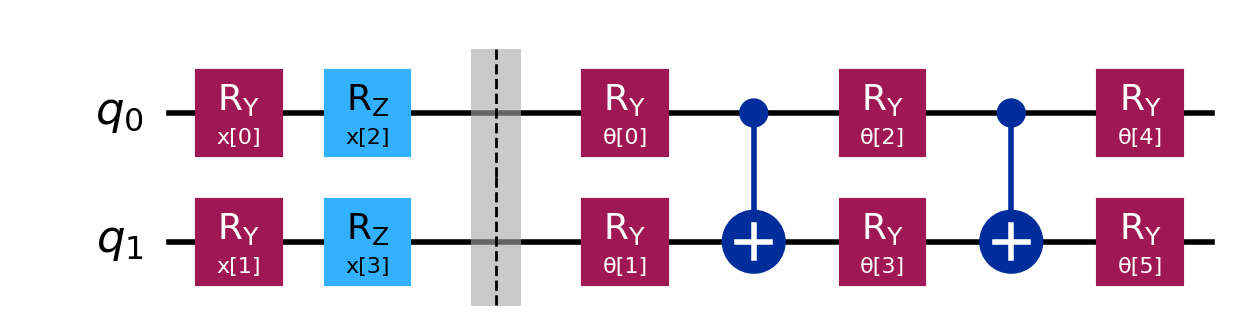

In [868]:
qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output='mpl', style='iqx', scale=2)

In [869]:
seed = algorithm_globals.random_seed
initial_weights = algorithm_globals.random.random(ansatz.num_parameters)

/tmp/ipykernel_8133/3680567682.py:1: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  seed = algorithm_globals.random_seed
/tmp/ipykernel_8133/3680567682.py:2: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  initial_weights = algorithm_glob

In [870]:
vqc = VQC(
    optimizer=opt,
    ansatz=ansatz,
    feature_map=featuremap,
    initial_point=initial_weights,
    callback=callback_graph,
    loss='cross_entropy'
)

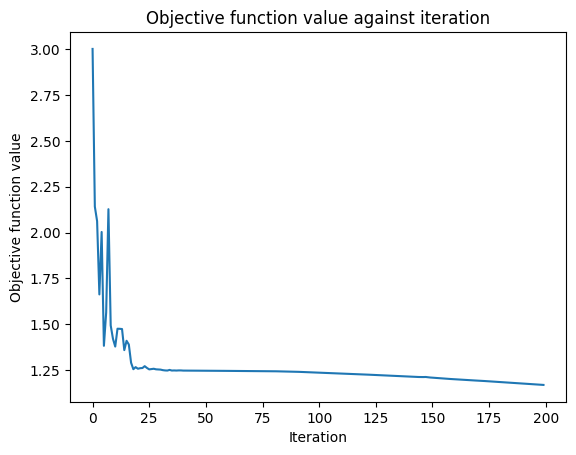

In [871]:
vqc.fit(X_train, Y_train)

In [872]:
scores_zz_r.append(vqc.score(X_test, Y_test))

In [873]:
scores_zz_r

[0.43333333333333335,
 0.43333333333333335,
 0.3,
 0.23333333333333334,
 0.43333333333333335,
 0.3,
 0.3333333333333333,
 0.23333333333333334,
 0.2,
 0.23333333333333334,
 0.43333333333333335,
 0.4666666666666667,
 0.3,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.26666666666666666,
 0.5333333333333333,
 0.43333333333333335,
 0.7,
 0.7,
 0.43333333333333335,
 0.7,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.43333333333333335,
 0.7,
 0.43333333333333335,
 0.7,
 0.43333333333333335,
 0.7,
 0.43333333333333335,
 0.7,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.6666666666666666,
 0.7333333333333333,
 0.7333333333333333,
 0.7,
 0.7333333333333333,
 0.7333333333333333,
 0.7,
 0.7333333333333333,
 0.6666666666666666,
 0.7333333333333333,
 0.7,
 0.5666666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.5,
 0.7333333333333333,
 0.733

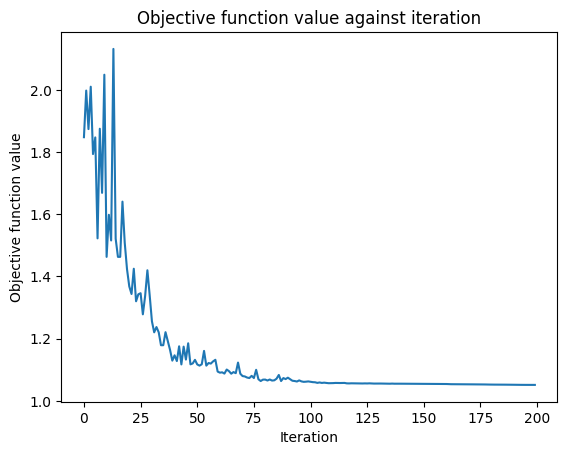

[0.43333333333333335, 0.43333333333333335, 0.3, 0.23333333333333334, 0.43333333333333335, 0.3, 0.3333333333333333, 0.23333333333333334, 0.2, 0.23333333333333334, 0.43333333333333335, 0.4666666666666667, 0.3, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.26666666666666666, 0.5333333333333333, 0.43333333333333335, 0.7, 0.7, 0.43333333333333335, 0.7, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.7, 0.43333333333333335, 0.7, 0.43333333333333335, 0.7, 0.43333333333333335, 0.7, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.6666666666666666, 0.7333333333333333, 0.7333333333333333, 0.7, 0.7333333333333333, 0.7333333333333333, 0.7, 0.7333333333333333, 0.6666666666666666, 0.7333333333333333, 0.7, 0.5666666666666667, 0.7333333333333333, 0.7333333333333333, 0.5, 0.7333333333333333, 0.7333333333333333, 0.6333333333333333, 0.6666666666666666, 0.

In [974]:
iris = load_iris()
X = iris['data']
Y = iris['target']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

num_qubits = X.shape[1]//2
MAXITR = 200
opt = COBYLA(maxiter=MAXITR)

objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    
featuremap = EfficientSU2(num_qubits=num_qubits, parameter_prefix='x', reps=0)
ansatz = TwoLocal(num_qubits=num_qubits, reps=3, rotation_blocks=['ry', 'rz'], entanglement_blocks='cz', entanglement='linear')

# ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3, entanglement="reverse_linear")

qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output='mpl', style='iqx', scale=2)

seed = algorithm_globals.random_seed
initial_weights = algorithm_globals.random.random(ansatz.num_parameters)

vqc = VQC(
    optimizer=opt,
    ansatz=ansatz,
    feature_map=featuremap,
    initial_point=initial_weights,
    callback=callback_graph,
    loss='cross_entropy'
)



vqc.fit(X_train, Y_train)

scores_zz_r.append(vqc.score(X_test, Y_test))

print(scores_zz_r)

In [10]:
scores_zz_r = []